In [210]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [211]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [212]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [213]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [214]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [215]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [216]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [217]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [218]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [219]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [220]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [221]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [222]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [01:25,  1.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


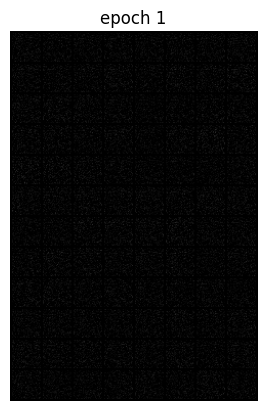

Epoch 1 of 100
Generator loss: 82.16900495, Discriminator loss: 0.17652221


118it [01:27,  1.35it/s]                         


Epoch 2 of 100
Generator loss: 100.73163259, Discriminator loss: 0.00010337


118it [01:22,  1.44it/s]                         


Epoch 3 of 100
Generator loss: 100.75257424, Discriminator loss: 0.00006366


118it [01:22,  1.43it/s]                         


Epoch 4 of 100
Generator loss: 100.73525531, Discriminator loss: 0.00004123


118it [01:23,  1.41it/s]                         


Epoch 5 of 100
Generator loss: 100.75850084, Discriminator loss: 0.00002899


118it [01:22,  1.44it/s]                         


Epoch 6 of 100
Generator loss: 100.75155131, Discriminator loss: 0.00002149


118it [01:21,  1.45it/s]                         


Epoch 7 of 100
Generator loss: 100.73748284, Discriminator loss: 0.00001594


118it [01:22,  1.43it/s]                         


Epoch 8 of 100
Generator loss: 100.74789018, Discriminator loss: 0.00001251


118it [01:29,  1.32it/s]                         


Epoch 9 of 100
Generator loss: 100.74132518, Discriminator loss: 0.00001014


118it [01:16,  1.55it/s]                         


Epoch 10 of 100
Generator loss: 100.73599315, Discriminator loss: 0.00000826


118it [01:17,  1.52it/s]                         


Epoch 11 of 100
Generator loss: 100.76568512, Discriminator loss: 0.00000681


118it [01:16,  1.55it/s]                         


Epoch 12 of 100
Generator loss: 100.75430572, Discriminator loss: 0.00000572


118it [01:18,  1.51it/s]                         


Epoch 13 of 100
Generator loss: 100.75147319, Discriminator loss: 0.00000490


118it [01:17,  1.51it/s]                         


Epoch 14 of 100
Generator loss: 100.76129007, Discriminator loss: 0.00000412


118it [01:32,  1.27it/s]                         


Epoch 15 of 100
Generator loss: 100.76426253, Discriminator loss: 0.00000361


118it [01:22,  1.42it/s]                         


Epoch 16 of 100
Generator loss: 100.75859115, Discriminator loss: 0.00000315


118it [01:20,  1.47it/s]                         


Epoch 17 of 100
Generator loss: 100.75579475, Discriminator loss: 0.00000279


118it [01:25,  1.37it/s]                         


Epoch 18 of 100
Generator loss: 100.77806091, Discriminator loss: 0.00000240


118it [01:23,  1.41it/s]                         


Epoch 19 of 100
Generator loss: 100.75270824, Discriminator loss: 0.00000213


118it [01:30,  1.30it/s]                         


Epoch 20 of 100
Generator loss: 100.74597135, Discriminator loss: 0.00000193


118it [02:01,  1.03s/it]                         


Epoch 21 of 100
Generator loss: 100.75702348, Discriminator loss: 0.00000173


118it [01:46,  1.11it/s]                         


Epoch 22 of 100
Generator loss: 100.76854960, Discriminator loss: 0.00000151


118it [01:48,  1.09it/s]                         


Epoch 23 of 100
Generator loss: 100.76974539, Discriminator loss: 0.00000138


118it [01:47,  1.10it/s]                         


Epoch 24 of 100
Generator loss: 100.76412651, Discriminator loss: 0.00000125


118it [01:25,  1.38it/s]                         


Epoch 25 of 100
Generator loss: 100.77818116, Discriminator loss: 0.00000113


118it [01:50,  1.06it/s]                         


Epoch 26 of 100
Generator loss: 100.77249785, Discriminator loss: 0.00000103


118it [01:45,  1.12it/s]                         


Epoch 27 of 100
Generator loss: 100.75839527, Discriminator loss: 0.00000090


118it [01:50,  1.07it/s]                         


Epoch 28 of 100
Generator loss: 100.77248911, Discriminator loss: 0.00000085


118it [01:50,  1.07it/s]                         


Epoch 29 of 100
Generator loss: 100.76003428, Discriminator loss: 0.00000077


118it [01:48,  1.08it/s]                         


Epoch 30 of 100
Generator loss: 100.77243505, Discriminator loss: 0.00000070


118it [01:48,  1.09it/s]                         


Epoch 31 of 100
Generator loss: 100.77243146, Discriminator loss: 0.00000065


118it [01:47,  1.10it/s]                         


Epoch 32 of 100
Generator loss: 100.76831961, Discriminator loss: 0.00000059


118it [01:48,  1.09it/s]                         


Epoch 33 of 100
Generator loss: 100.76841410, Discriminator loss: 0.00000054


118it [01:47,  1.10it/s]                         


Epoch 34 of 100
Generator loss: 100.76985573, Discriminator loss: 0.00000049


118it [01:44,  1.13it/s]                         


Epoch 35 of 100
Generator loss: 100.77652251, Discriminator loss: 0.00000047


118it [01:45,  1.12it/s]                         


Epoch 36 of 100
Generator loss: 100.77816870, Discriminator loss: 0.00000043


118it [01:44,  1.13it/s]                         


Epoch 37 of 100
Generator loss: 100.78237967, Discriminator loss: 0.00000039


118it [01:46,  1.11it/s]                         


Epoch 38 of 100
Generator loss: 100.76710406, Discriminator loss: 0.00000036


118it [01:52,  1.05it/s]                         


Epoch 39 of 100
Generator loss: 100.76412866, Discriminator loss: 0.00000033


118it [01:46,  1.11it/s]                         


Epoch 40 of 100
Generator loss: 100.76976346, Discriminator loss: 0.00000031


118it [01:46,  1.11it/s]                         


Epoch 41 of 100
Generator loss: 100.76682353, Discriminator loss: 0.00000028


118it [01:43,  1.14it/s]                         


Epoch 42 of 100
Generator loss: 100.77251395, Discriminator loss: 0.00000026


118it [01:33,  1.27it/s]                         


Epoch 43 of 100
Generator loss: 100.76829751, Discriminator loss: 0.00000024


118it [01:31,  1.29it/s]                         


Epoch 44 of 100
Generator loss: 100.78113928, Discriminator loss: 0.00000023


118it [01:25,  1.39it/s]                         


Epoch 45 of 100
Generator loss: 100.77410458, Discriminator loss: 0.00000021


118it [01:15,  1.56it/s]                         


Epoch 46 of 100
Generator loss: 100.76980213, Discriminator loss: 0.00000020


118it [01:13,  1.61it/s]                         


Epoch 47 of 100
Generator loss: 100.77411313, Discriminator loss: 0.00000018


118it [01:14,  1.58it/s]                         


Epoch 48 of 100
Generator loss: 100.76575653, Discriminator loss: 0.00000017


118it [01:13,  1.61it/s]                         


Epoch 49 of 100
Generator loss: 100.77546607, Discriminator loss: 0.00000015


118it [01:13,  1.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


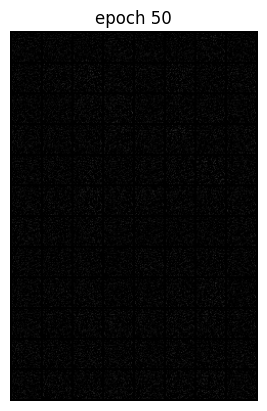

Epoch 50 of 100
Generator loss: 100.77963479, Discriminator loss: 0.00000014


118it [01:14,  1.59it/s]                         


Epoch 51 of 100
Generator loss: 100.78675431, Discriminator loss: 0.00000014


118it [01:12,  1.62it/s]                         


Epoch 52 of 100
Generator loss: 100.77693750, Discriminator loss: 0.00000013


118it [01:15,  1.57it/s]                         


Epoch 53 of 100
Generator loss: 100.78115323, Discriminator loss: 0.00000012


118it [01:13,  1.61it/s]                         


Epoch 54 of 100
Generator loss: 100.77465227, Discriminator loss: 0.00000011


118it [01:14,  1.58it/s]                         


Epoch 55 of 100
Generator loss: 100.77539819, Discriminator loss: 0.00000010


118it [01:14,  1.58it/s]                         


Epoch 56 of 100
Generator loss: 100.77398030, Discriminator loss: 0.00000009


118it [01:13,  1.61it/s]                         


Epoch 57 of 100
Generator loss: 100.78102360, Discriminator loss: 0.00000009


118it [01:15,  1.56it/s]                         


Epoch 58 of 100
Generator loss: 100.79220366, Discriminator loss: 0.00000008


118it [01:13,  1.61it/s]                         


Epoch 59 of 100
Generator loss: 100.78811887, Discriminator loss: 0.00000008


118it [01:13,  1.60it/s]                         


Epoch 60 of 100
Generator loss: 100.78244755, Discriminator loss: 0.00000007


118it [01:13,  1.60it/s]                         


Epoch 61 of 100
Generator loss: 100.77270873, Discriminator loss: 0.00000007


118it [01:13,  1.60it/s]                         


Epoch 62 of 100
Generator loss: 100.77640181, Discriminator loss: 0.00000006


118it [01:15,  1.56it/s]                         


Epoch 63 of 100
Generator loss: 100.77132729, Discriminator loss: 0.00000006


118it [01:13,  1.61it/s]                         


Epoch 64 of 100
Generator loss: 100.78117925, Discriminator loss: 0.00000006


118it [01:14,  1.58it/s]                         


Epoch 65 of 100
Generator loss: 100.79098856, Discriminator loss: 0.00000005


118it [01:14,  1.58it/s]                         


Epoch 66 of 100
Generator loss: 100.78253246, Discriminator loss: 0.00000005


118it [01:13,  1.61it/s]                         


Epoch 67 of 100
Generator loss: 100.78683420, Discriminator loss: 0.00000005


118it [01:14,  1.58it/s]                         


Epoch 68 of 100
Generator loss: 100.78400617, Discriminator loss: 0.00000004


118it [01:14,  1.59it/s]                         


Epoch 69 of 100
Generator loss: 100.78639528, Discriminator loss: 0.00000004


118it [01:14,  1.58it/s]                         


Epoch 70 of 100
Generator loss: 100.78548790, Discriminator loss: 0.00000004


118it [01:13,  1.61it/s]                         


Epoch 71 of 100
Generator loss: 100.79930780, Discriminator loss: 0.00000003


118it [01:13,  1.61it/s]                         


Epoch 72 of 100
Generator loss: 100.78955287, Discriminator loss: 0.00000003


118it [01:16,  1.55it/s]                         


Epoch 73 of 100
Generator loss: 100.78815388, Discriminator loss: 0.00000003


118it [01:20,  1.47it/s]                         


Epoch 74 of 100
Generator loss: 100.78821349, Discriminator loss: 0.00000003


118it [01:19,  1.48it/s]                         


Epoch 75 of 100
Generator loss: 100.79246651, Discriminator loss: 0.00000003


118it [01:18,  1.51it/s]                         


Epoch 76 of 100
Generator loss: 100.78663055, Discriminator loss: 0.00000002


118it [01:19,  1.49it/s]                         


Epoch 77 of 100
Generator loss: 100.78215144, Discriminator loss: 0.00000002


118it [01:13,  1.61it/s]                         


Epoch 78 of 100
Generator loss: 100.81075215, Discriminator loss: 0.00000002


118it [01:13,  1.60it/s]                         


Epoch 79 of 100
Generator loss: 100.80373480, Discriminator loss: 0.00000002


118it [01:14,  1.59it/s]                         


Epoch 80 of 100
Generator loss: 100.80094284, Discriminator loss: 0.00000002


118it [01:28,  1.33it/s]                         


Epoch 81 of 100
Generator loss: 100.79809622, Discriminator loss: 0.00000002


118it [01:37,  1.21it/s]                         


Epoch 82 of 100
Generator loss: 100.80374315, Discriminator loss: 0.00000002


118it [01:37,  1.22it/s]                         


Epoch 83 of 100
Generator loss: 100.81225064, Discriminator loss: 0.00000002


118it [01:48,  1.09it/s]                         


Epoch 84 of 100
Generator loss: 100.81353388, Discriminator loss: 0.00000001


118it [01:46,  1.11it/s]                         


Epoch 85 of 100
Generator loss: 100.80101646, Discriminator loss: 0.00000001


118it [01:47,  1.10it/s]                         


Epoch 86 of 100
Generator loss: 100.80611661, Discriminator loss: 0.00000001


118it [01:46,  1.11it/s]                         


Epoch 87 of 100
Generator loss: 100.80944655, Discriminator loss: 0.00000001


118it [01:45,  1.12it/s]                         


Epoch 88 of 100
Generator loss: 100.80173369, Discriminator loss: 0.00000001


118it [01:46,  1.10it/s]                         


Epoch 89 of 100
Generator loss: 100.81356296, Discriminator loss: 0.00000001


118it [01:47,  1.10it/s]                         


Epoch 90 of 100
Generator loss: 100.81227021, Discriminator loss: 0.00000001


118it [01:46,  1.10it/s]                         


Epoch 91 of 100
Generator loss: 100.80534943, Discriminator loss: 0.00000001


118it [01:41,  1.17it/s]                         


Epoch 92 of 100
Generator loss: 100.81657612, Discriminator loss: 0.00000001


118it [01:30,  1.30it/s]                         


Epoch 93 of 100
Generator loss: 100.81095404, Discriminator loss: 0.00000001


118it [01:30,  1.30it/s]                         


Epoch 94 of 100
Generator loss: 100.81176432, Discriminator loss: 0.00000001


118it [01:28,  1.33it/s]                         


Epoch 95 of 100
Generator loss: 100.81787742, Discriminator loss: 0.00000001


118it [01:20,  1.47it/s]                         


Epoch 96 of 100
Generator loss: 100.82078917, Discriminator loss: 0.00000001


118it [01:12,  1.63it/s]                         


Epoch 97 of 100
Generator loss: 100.81230529, Discriminator loss: 0.00000001


118it [01:14,  1.59it/s]                         


Epoch 98 of 100
Generator loss: 100.81358129, Discriminator loss: 0.00000001


118it [01:11,  1.66it/s]                         


Epoch 99 of 100
Generator loss: 100.81931188, Discriminator loss: 0.00000001


118it [01:11,  1.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


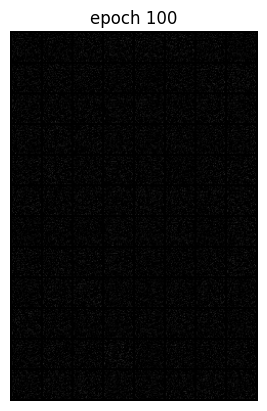

Epoch 100 of 100
Generator loss: 100.81941269, Discriminator loss: 0.00000001


In [223]:
torch.manual_seed(7777)

def generator_loss(output, fake_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, fake_label)
    ######################################
    
def discriminator_loss(real_output, fake_output, real_label, fake_label):
    ############ YOUR CODE HERE ##########
    return (criterion(real_output, real_label) + criterion(fake_output, fake_label))
    ######################################
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        image, _ = data #image is a tensor representation the input image 
        image = image.to(device)
        b_size = len(image)

        real_data = image.view(b_size, -1) #reshape this tensor to a 2D tensor with dimensions (batch_size, -1).
        real_label = label_real(b_size)
        real_output = discriminator(real_data)

        #train discriminator=========================
        noise = create_noise(b_size, nz)
        fake_data = generator(noise)
        fake_label = label_fake(b_size)
        fake_output = discriminator(fake_data)
        
        d_loss = discriminator_loss(real_output, fake_output, real_label, fake_label)
        optim_d.zero_grad()
        d_loss.backward()
        optim_d.step()

        #train generator============ 
        noise = create_noise(b_size, nz)
        fake_data = generator(noise)
        output = discriminator(real_data)
        #  the negative log-likelihood of the discriminator's output for the generated fake sample being "fake" 
        g_loss = generator_loss(output, fake_label)
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()

        loss_g += g_loss.item()
        loss_d += d_loss.item()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if epoch == 0 or epoch == 49 or epoch == 99:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
        
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [224]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [225]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

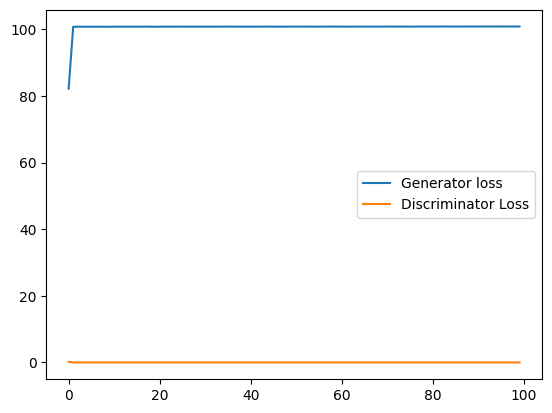

In [226]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')